# Fast.ai Deep Learning #8: PASCAL

Github, [link](https://github.com/fastai/fastai/blob/master/courses/dl2/pascal.ipynb)

In [1]:
# fast ai installations
!pip install fastai==0.7.0
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 122kB 3.8MB/s 
    100% |████████████████████████████████| 184kB 7.5MB/s 
    100% |████████████████████████████████| 61kB 24.5MB/s 
    100% |████████████████████████████████| 1.5MB 14.8MB/s 
    100% |████████████████████████████████| 3.6MB 1.2MB/s 
    100% |████████████████████████████████| 496.4MB 30kB/s 
    100% |████████████████████████████████| 71kB 25.9MB/s 
    100% |████████████████████████████████| 92kB 6.8MB/s 
    100% |████████████████████████████████| 11.6MB 2.3MB/s 
    100% |████████████████████████████████| 61kB 22.3MB/s 
    100% |████████████████████████████████| 81kB 27.7MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [4]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

0.3.1
True
True


# Get Data

In [5]:
# get pascal 2007 data
!wget pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar

--2018-12-31 10:51:02--  http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar [following]
--2018-12-31 10:51:02--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  23.3MB/s    in 20s     

2018-12-31 10:51:23 (22.2 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



In [6]:
# unzip .tar file
!tar -xvf VOCtrainval_06-Nov-2007.tar

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000005.xml
VOCdevkit/VOC2007/Annotations/000007.xml
VOCdevkit/VOC2007/Annotations/000009.xml
VOCdevkit/VOC2007/Annotations/000012.xml
VOCdevkit/VOC2007/Annotations/000016.xml
VOCdevkit/VOC2007/Annotations/000017.xml
VOCdevkit/VOC2007/Annotations/000019.xml
VOCdevkit/VOC2007/Annotations/000020.xml
VOCdevkit/VOC2007/Annotations/000021.xml
VOCdevkit/VOC2007/Annotations/000023.xml
VOCdevkit/VOC2007/Annotations/000024.xml
VOCdevkit/VOC2007/Annotations/000026.xml
VOCdevkit/VOC2007/Annotations/000030.xml
VOCdevkit/VOC2007/Annotations/000032.xml
VOCdevkit/VOC2007/Annotations/000033.xml
VOCdevkit/VOC2007/Annotations/000034.xml
VOCdevkit/VOC2007/Annotations/000035.xml
VOCdevkit/VOC2007/Annotations/000036.xml
VOCdevkit/VOC2007/Annotations/000039.xml
VOCdevkit/VOC2007/Annotations/000041.xml
VOCdevkit/VOC2007/Annotations/000042.xml
VOCdevkit/VOC2007/Annotations/000044.xml
VOCdevkit/VOC2007/Annotations/000046.

In [7]:
# get annotations in json format
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip

--2018-12-31 10:51:48--  https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1998182 (1.9M) [application/zip]
Saving to: ‘PASCAL_VOC.zip’

PASCAL_VOC.zip      100%[===================>]   1.91M  --.-KB/s    in 0.02s   

2018-12-31 10:51:49 (80.8 MB/s) - ‘PASCAL_VOC.zip’ saved [1998182/1998182]



In [0]:
# if you need to manually label data
# XML: https://github.com/tzutalin/labelImg
# https://github.com/puzzledqs/BBox-Label-Tool
# https://www.quora.com/What-is-the-best-image-labeling-tool-for-object-detection

In [0]:
# unzip JSON annotations to proper directory
!unzip -qq PASCAL_VOC.zip -d VOCdevkit/VOC2007/

In [21]:
# find jpg images
!ls VOCdevkit/VOC2007/JPEGImages | head

000005.jpg
000007.jpg
000009.jpg
000012.jpg
000016.jpg
000017.jpg
000019.jpg
000020.jpg
000021.jpg
000023.jpg


In [32]:
# look at VOC2007 directory
!ls VOCdevkit/VOC2007

Annotations  JPEGImages  SegmentationClass
ImageSets    PASCAL_VOC  SegmentationObject


In [0]:
# rename JSON annotation directory to "Annot_JSON"
# https://askubuntu.com/questions/56326/how-do-i-rename-a-directory-via-the-command-line

!mv VOCdevkit/VOC2007/PASCAL_VOC VOCdevkit/VOC2007/Annot_JSON

In [38]:
# check VOC2007 again
!ls VOCdevkit/VOC2007

Annotations  ImageSets	 SegmentationClass
Annot_JSON   JPEGImages  SegmentationObject


In [39]:
# view JSON annotation files
!ls VOCdevkit/VOC2007/Annot_JSON

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json


#PASCAL VOC

pathlib is now part of the Python 3 standard libarary. We can use it for our paths and file access. Note that it returns an OS-specific class (on Linux, PosixPath). Most libraries take paths as input can take a pathlib object - although some (like cv2) can't, in which case you can use str() to convert it to a string.

"Path" is part of pathlib

In [0]:
PATH = Path('VOCdevkit/VOC2007')

.iterdir() allows us to iterate a directory. PATH.iterdir() will return generator objects. We can turn it into a list with list(). 

In [167]:
list(PATH.iterdir())

[PosixPath('VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('VOCdevkit/VOC2007/ImageSets'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('VOCdevkit/VOC2007/Annotations'),
 PosixPath('VOCdevkit/VOC2007/models'),
 PosixPath('VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('VOCdevkit/VOC2007/tmp'),
 PosixPath('VOCdevkit/VOC2007/Annot_JSON')]

In [168]:
for i in PATH.iterdir(): print(i)

VOCdevkit/VOC2007/SegmentationObject
VOCdevkit/VOC2007/ImageSets
VOCdevkit/VOC2007/JPEGImages
VOCdevkit/VOC2007/Annotations
VOCdevkit/VOC2007/models
VOCdevkit/VOC2007/SegmentationClass
VOCdevkit/VOC2007/tmp
VOCdevkit/VOC2007/Annot_JSON


```pathlib``` includes the ability to open files with .open()

In [0]:
trn_j = json.load((PATH/'Annot_JSON/pascal_train2007.json').open())

#trn_j will be a giant dictionary with annotations

In [169]:
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [44]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

Bounding boxes in this format show \[column, row, height, width].

In [45]:
trn_j[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [46]:
trn_j[CATEGORIES][:4]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [0]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [49]:
list((PATH).iterdir())

[PosixPath('VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('VOCdevkit/VOC2007/ImageSets'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('VOCdevkit/VOC2007/Annotations'),
 PosixPath('VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('VOCdevkit/VOC2007/Annot_JSON')]

In [0]:
JPEGS = 'JPEGImages'

In [56]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('VOCdevkit/VOC2007/JPEGImages/008093.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/007448.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/005327.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/005559.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/005606.jpg')]

In [57]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

Here we create a dict from image IDs to a list of annotations (tuple of bounding box and class id).

Convert VOC's height / width into top-left/bottom-right format and switch x/y coords to be consistent with Numpy

In [58]:
# converting bounding boxes into numpy
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

# collections.defaultdict is just like a dictionary, but if you try to access a key
# that doesn't exist, it creates it and sets itself equal to return value of function
trn_anno = collections.defaultdict(lambda:[])

for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [59]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [60]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [61]:
cats[7]

'car'

In [62]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [63]:
cats[15],cats[13]

('person', 'horse')

Some libs take VOC format bounding boxes, so this let's us convert back when required:

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [66]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

```open_image``` function from [this link] (https://github.com/fastai/fastai/blob/master/fastai/datasets.py), but appears it has been modified for v1.0

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

Matplotlib's plt.subplots is a really useful wrapper for creating plots, regardless of whether you have more than one subplot. Note that Matplotlib has an optional object-oriented API which I think is much easier to understand and use (although few examples online use it!)

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

A simple but rarely used trick to making text visible regardless of background is to use white text with black outline, or visa versa. Here's how to do it in matplotlib.

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

Note that * in argument lists is the splat operator. In this case it's a little shortcut compared to writing out b[-2],b[-1].

In [0]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

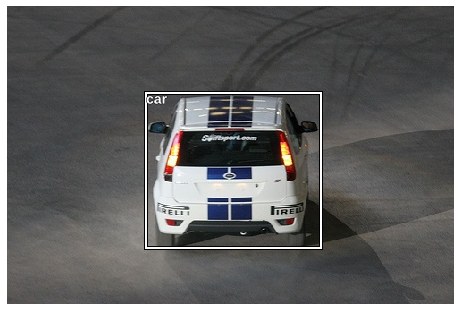

In [72]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
# draw images with annotations
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
# draw image with index
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


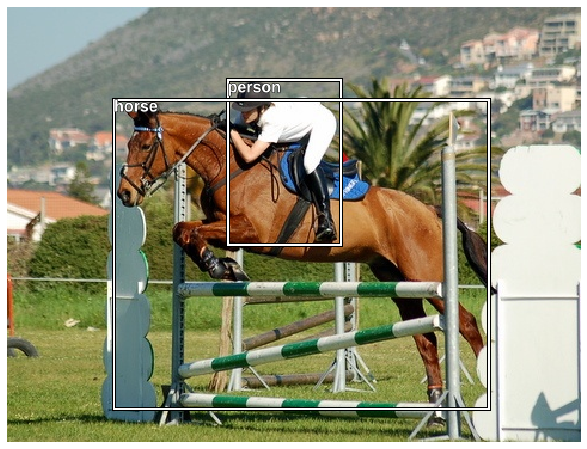

In [77]:
draw_idx(17)

## Largest item classifier

A lambda function is simply a way to define an anonymous function inline. Here we use it to describe how to sort the annotation for each image - by bounding box size (descending).


In [0]:
# get largest bounding box
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [0]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

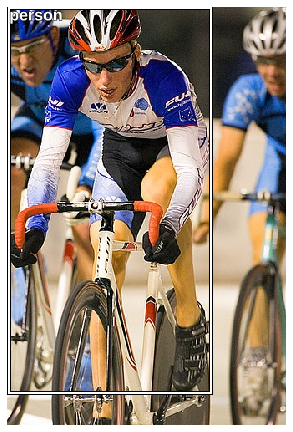

In [80]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

Often it's easiest to simply create a CSV of the data you want to model, rather than trying to create a custom dataset. Here we use Pandas to help us create a CSV of the image filename and class.

In [0]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [0]:
f_model = resnet34
sz=224
bs=64

In [89]:
!ls {PATH}

Annotations  ImageSets	 SegmentationClass   tmp
Annot_JSON   JPEGImages  SegmentationObject


In [0]:
# crop type argument -> we don't want to crop b/c we have bounding boxes and objects might be near edges
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [0]:
x,y=next(iter(md.val_dl))

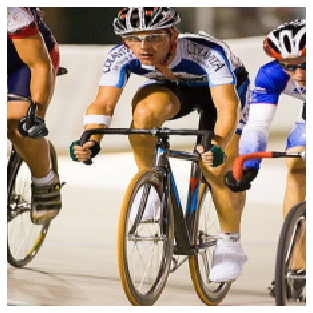

In [87]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [0]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])

In [0]:
learn.opt_fn = optim.Adam

In [94]:
lrf=learn.lr_find(1e-5,100)

 81%|████████▏ | 26/32 [00:19<00:01,  3.33it/s, loss=38.1]

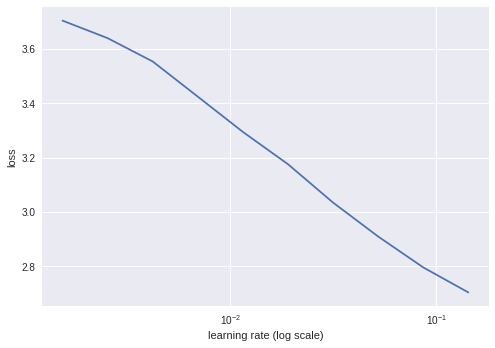

In [95]:
learn.sched.plot()

In [0]:
# fix chart to see relevant portion
learn.sched.plot(n_skip=5, n_skip_end=1)

In [0]:
lr = 2e-2

In [97]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.28739    0.597851   0.812     


[array([0.59785]), 0.8120000009536743]

In [0]:
lrs = np.array([lr/1000,lr/100,lr])

In [0]:
learn.freeze_to(-2)

 84%|████████▍ | 27/32 [00:23<00:02,  1.74it/s, loss=4.1] 

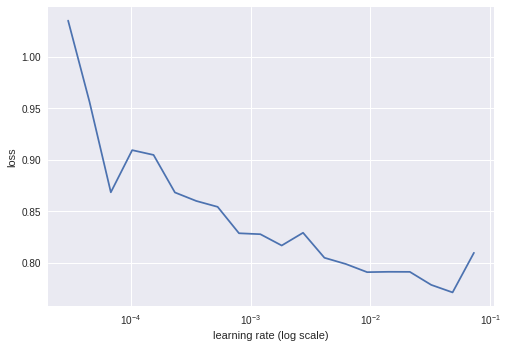

In [103]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [104]:
learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.766065   0.596486   0.812     


[array([0.59649]), 0.8120000009536743]

In [0]:
learn.unfreeze()

In [106]:
learn.fit(lrs/5, 1, cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.587592   0.570746   0.84      
    1      0.441683   0.539734   0.836     


[array([0.53973]), 0.8359999976158142]

In [0]:
learn.save('clas_one')

In [0]:
learn.load('clas_one')

In [0]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

### Debugger Lesson
around 1:45:00 on [this video](https://www.youtube.com/watch?time_continue=6420&v=Z0ssNAbe81M)

You can use the python debugger pdb to step through code.

    pdb.set_trace() to set a breakpoint
    %debug magic to trace an error

Commands you need to know:

    s / n / c
    u / d
    p
    l

Example

```
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    pdb.set_trace()
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()
```

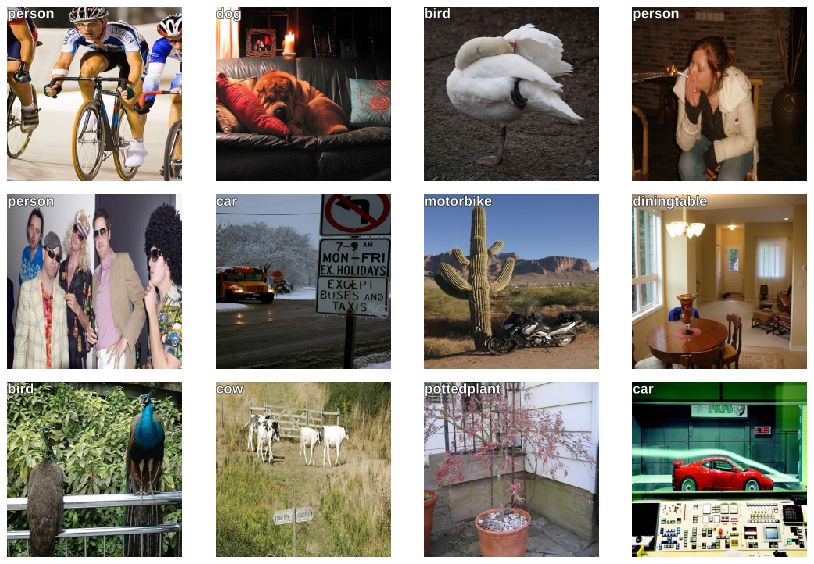

In [110]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

#Bbox Only

In [0]:
BB_CSV = PATH/'tmp/bb.csv'

In [0]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [113]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [0]:
f_model=resnet34
sz=224
bs=64

Set continuous=True to tell fastai this is a regression problem, which means it won't one-hot encode the labels, and will use MSE as the default crit.

Note that we have to tell the transforms constructor that our labels are coordinates, so that it can handle the transforms correctly.

Also, we use CropType.NO because we want to 'squish' the rectangular images into squares, rather than center cropping, so that we don't accidentally crop out some of the objects. (This is less of an issue in something like imagenet, where there is a single object to classify, and it's generally large and centrally located).


In [0]:
augs = [RandomFlip(), 
        RandomRotate(30),
        RandomLighting(0.1,0.1)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]


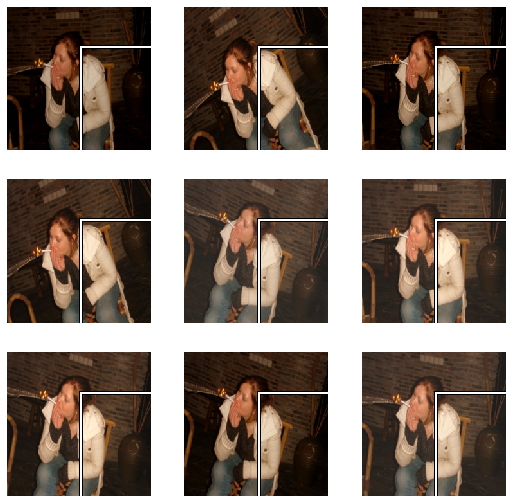

In [117]:
# this showcases issues with data augmentation when using bounding boxes
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [0]:
# in order to augment data, we must apply transformations to everything so bb are in right location
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 52.  28. 128. 195.]
[ 66.  38. 105. 183.]
[ 58.  33. 118. 190.]
[ 23.  11. 154. 212.]
[ 45.  10. 158. 213.]
[ 52.  38. 106. 183.]
[ 64.  36. 109. 186.]
[ 66.  38. 105. 183.]
[ 33.  18. 159. 205.]


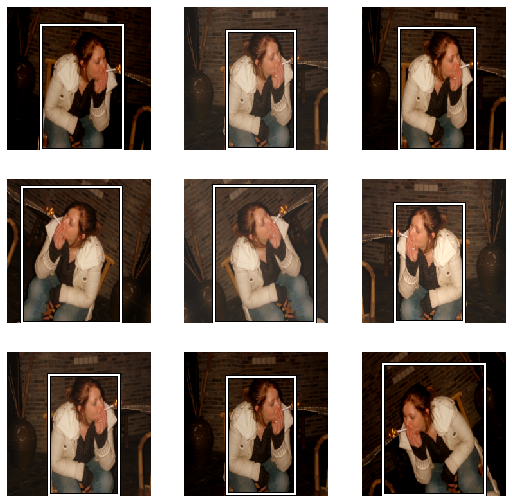

In [120]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [0]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

fastai let's you use a custom_head to add your own module on top of a convnet, instead of the adaptive pooling and fully connected net which is added by default. In this case, we don't want to do any pooling, since we need to know the activations of each grid cell.

The final layer has 4 activations, one per bounding box coordinate. Our target is continuous, not categorical, so the MSE loss function used does not do any sigmoid or softmax to the module outputs.

In [122]:
512*7*7

25088

In [0]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [124]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

 78%|███████▊  | 25/32 [00:22<00:07,  1.05s/it, loss=469]

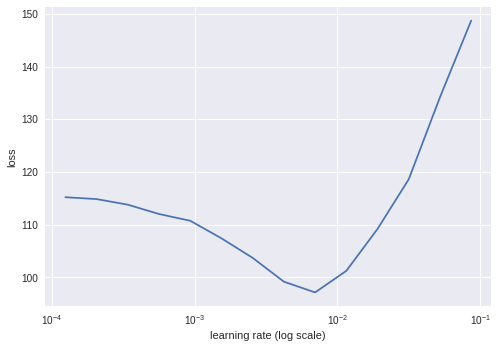

In [125]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [0]:
lr = 2e-3

In [127]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      48.428979  34.611492 
    1      37.612344  28.237494 
    2      31.719813  27.611131 


[array([27.61113])]

In [0]:
lrs = np.array([lr/100,lr/10,lr])

In [0]:
learn.freeze_to(-2)

epoch      trn_loss   val_loss   
    0      67.107367  568644718204813.2


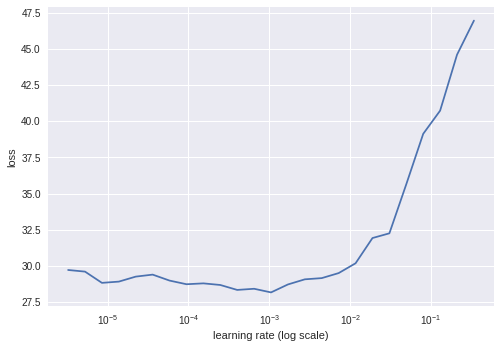

In [130]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [131]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      26.876923  23.659523 
    1      23.4868    20.829213 
    2      19.985136  19.838039 


[array([19.83804])]

In [0]:
learn.freeze_to(-3)

In [133]:
learn.fit(lrs, 1, cycle_len=2)

epoch      trn_loss   val_loss   
    0      19.886269  21.983493 
    1      17.31372   19.463957 


[array([19.46396])]

In [0]:
learn.save('reg4')

In [0]:
learn.load('reg4')

In [0]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

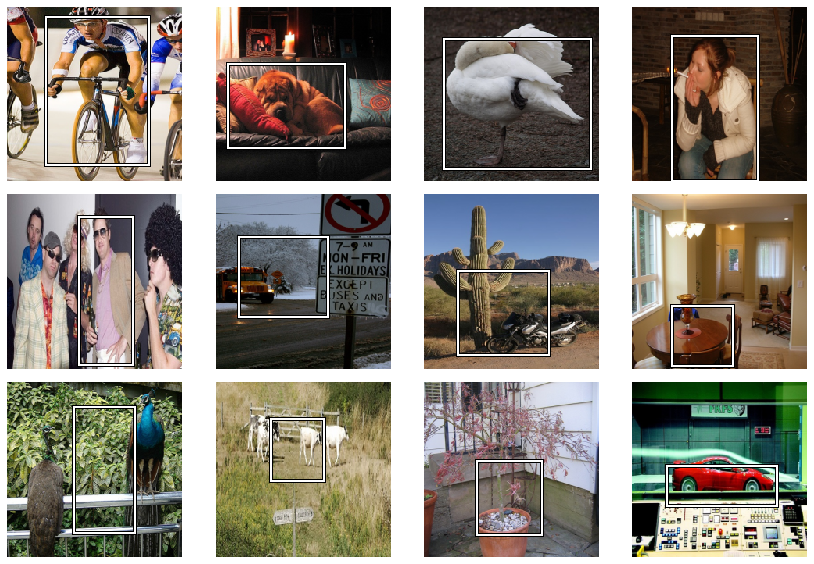

In [137]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

# Single Object Detection

In [0]:
f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
   bs=bs, continuous=True, val_idxs=val_idxs)

In [0]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

A dataset can be anything with __len__ and __getitem__. Here's a dataset that adds a 2nd label to an existing dataset:

In [0]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

We'll use it to add the classes to the bounding boxes labels.

In [0]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [143]:
val_ds2[0][1]

(array([  0.,  49., 205., 180.], dtype=float32), 14)

We can replace the dataloaders' datasets with these new ones.

In [0]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

We have to denormalize the images from the dataloader before they can be plotted.

In [145]:
x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

array([ 52.,  38., 107., 185.])

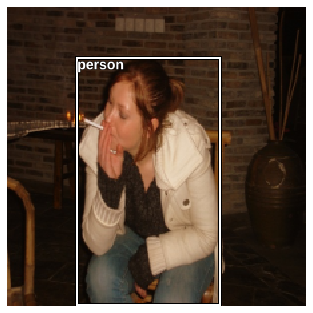

In [146]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

We need one output activation for each class (for its probability) plus one for each bounding box coordinate. We'll use an extra linear layer this time, plus some dropout, to help us train a more flexible model.

In [0]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [0]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

 97%|█████████▋| 31/32 [00:25<00:00,  2.66it/s, loss=733]

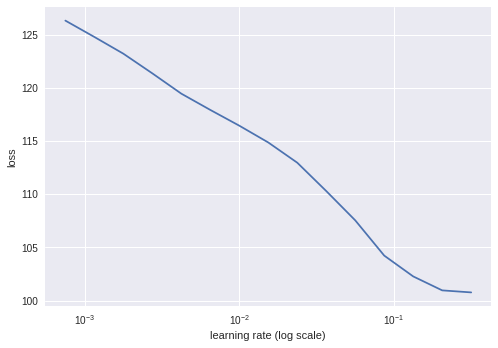

In [149]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=1e-2

In [151]:
learn.fit(lr, 1, cycle_len=3, use_clr=(32,5))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      75.569951  44.009749  0.8        31.762018 
    1      53.127838  36.478166  0.832      25.390088 
    2      44.051346  35.181394  0.842      24.666296 


[array([35.18139]), 0.8419999976158142, 24.666295837402345]

In [0]:
learn.save('reg1_0')

In [0]:
learn.freeze_to(-2)

In [0]:
lrs = np.array([lr/100, lr/10, lr])

 91%|█████████ | 29/32 [00:26<00:01,  1.71it/s, loss=233]

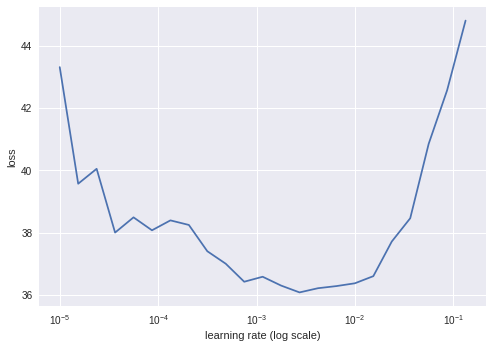

In [155]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)

In [156]:
learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      37.770189  34.929655  0.812      22.406577 
    1      32.103355  32.496413  0.828      21.380167 
    2      27.57794   31.097049  0.828      20.191569 
    3      23.996189  29.961203  0.838      19.513256 
    4      21.795435  29.775999  0.842      19.454231 


[array([29.776]), 0.8420000023841858, 19.454231246948243]

In [0]:
learn.save('reg1_1')

In [0]:
learn.load('reg1_1')

In [0]:
learn.unfreeze()

In [160]:
learn.fit(lrs/10, 1, cycle_len=10, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      18.969308  30.473612  0.82       19.236168 
    1      18.418025  30.159922  0.832      19.697971 
    2      17.567836  30.838219  0.814      19.12809  
    3      16.774612  29.235881  0.83       18.616853 
    4      15.694165  29.873442  0.82       18.670013 
    5      14.850927  29.641617  0.842      18.678088 
    6      14.309384  29.622106  0.828      18.35007  
    7      13.668432  29.463924  0.832      18.370868 
    8      13.183343  29.469921  0.828      18.207696 
    9      12.832123  29.354692  0.826      18.278361 


[array([29.35469]), 0.8260000009536743, 18.278361282348634]

In [0]:
learn.save('reg1')

In [0]:
learn.load('reg1')

In [0]:
y = learn.predict()
x,_ = next(iter(md.val_dl))

In [0]:
from scipy.special import expit

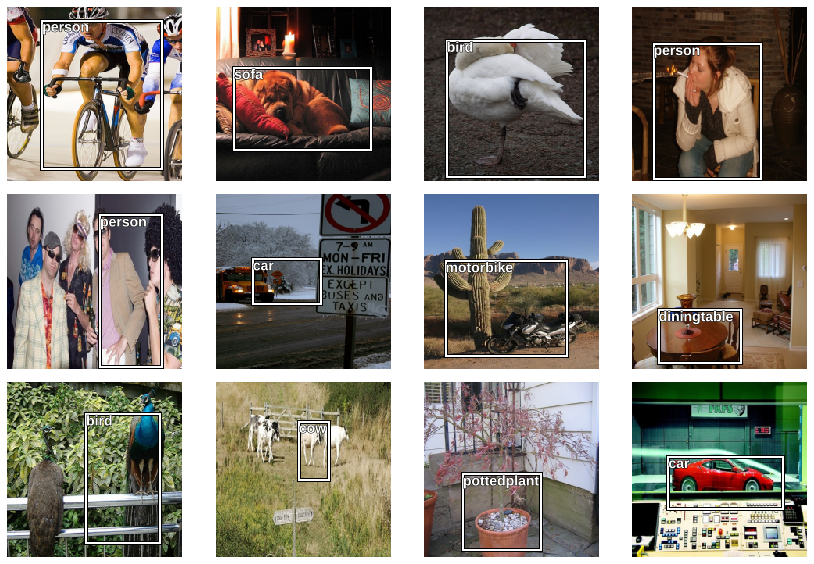

In [165]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[i]
    bb = expit(y[i][:4])*224
    b = bb_hw(bb)
    c = np.argmax(y[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()